# Practico Mentoria - Aprendizaje Supervisado

Vamos a tratar de predecir el resultado de un partido para el equipo local, es decir, si el equipo local gana (**Win**), empata (**Draw**) o pierde (**Lose**).
<h3><FONT COLOR="#FF0000"> Alumno: Flavio Olivier (Omega)</FONT></h3>

---

### Importaciones

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
#paquetería...

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from utils import plot_confusion_matrix


In [3]:
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [4]:
# Seteamos una semilla para Reproducibilidad
np.random.seed(42)

---

### Carga del Dateset

In [5]:
#daterio...

path = 'https://raw.githubusercontent.com/diplodatos2019mentoria/Aprendizaje_Supervisado/master/'

data_df = pd.read_csv(path + '/Datasets/football_data.csv')

print("Shape 'data_df'  = {}".format(data_df.shape))


Shape 'data_df'  = (322, 37)


In [6]:
data_df.head()

,home_team_goals_difference,away_team_goals_difference,games_won_home_team,games_won_away_team,games_against_won,games_against_lost,League_21518,League_24558,home_player_1_overall_rating,home_player_2_overall_rating,...,away_player_9_overall_rating,away_player_10_overall_rating,away_player_11_overall_rating,B365_Win,B365_Draw,B365_Lose,BW_Win,BW_Draw,BW_Lose,label
0,-5,-8,2,1,0,0,1,0,77.0,69.0,...,71.0,73.0,73.0,0.395683,0.287770,0.316547,0.389704,0.287782,0.322514,Draw
1,4,-2,4,1,0,0,1,0,76.0,79.0,...,76.0,71.0,72.0,0.624582,0.238903,0.136516,0.612713,0.253365,0.133922,Draw
2,18,7,6,6,0,0,1,0,81.0,81.0,...,78.0,90.0,88.0,0.390698,0.260465,0.348837,0.380496,0.279776,0.339728,Lose
3,1,1,2,3,0,0,1,0,79.0,65.0,...,81.0,81.0,79.0,0.360875,0.287606,0.351519,0.354839,0.290323,0.354839,Win
4,1,1,3,1,0,0,1,0,74.0,73.0,...,67.0,76.0,76.0,0.651526,0.223380,0.125093,0.634855,0.224066,0.141079,Draw


In [7]:
data_df.dtypes

home_team_goals_difference         int64
away_team_goals_difference         int64
games_won_home_team                int64
games_won_away_team                int64
games_against_won                  int64
games_against_lost                 int64
League_21518                       int64
League_24558                       int64
home_player_1_overall_rating     float64
home_player_2_overall_rating     float64
home_player_3_overall_rating     float64
home_player_4_overall_rating     float64
home_player_5_overall_rating     float64
home_player_6_overall_rating     float64
home_player_7_overall_rating     float64
home_player_8_overall_rating     float64
home_player_9_overall_rating     float64
home_player_10_overall_rating    float64
home_player_11_overall_rating    float64
away_player_1_overall_rating     float64
away_player_2_overall_rating     float64
away_player_3_overall_rating     float64
away_player_4_overall_rating     float64
away_player_5_overall_rating     float64
away_player_6_ov

### Obtemos el `input` y el `target` para los modelos

> Obtenemos el `target`

In [8]:
target_data = data_df.loc[:, 'label']

In [9]:
print("Shape 'target_data' = {}".format(target_data.shape))
display(target_data.head())
print('=' * 30)
display(target_data.dtypes)

Shape 'target_data' = (322,)


0    Draw
1    Draw
2    Lose
3     Win
4    Draw
Name: label, dtype: object

dtype('O')

In [10]:
target_data.unique()

array(['Draw', 'Lose', 'Win'], dtype=object)

Win     155
Lose     90
Draw     77
Name: label, dtype: int64

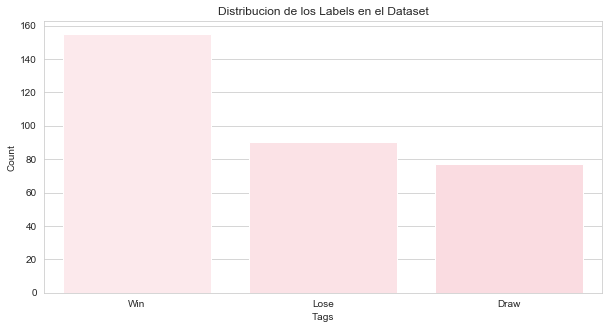

In [11]:
# TODO: Plotear la distribucion de los targets

plt.figure(figsize=(10, 5))

target_count = target_data.value_counts()
display(target_count)
my_order = ["Win", "Lose", "Draw"]

sns.barplot(target_count.index, target_count.values, order = my_order, palette = sns.light_palette('pink'))
plt.title('Distribucion de los Labels en el Dataset')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.show()

> Obtenemos el `input_data`

In [12]:
input_data = data_df.drop('label', axis=1)

In [13]:
print("Shape 'input_data' = {}".format(input_data.shape))
display(input_data.head())
print('=' * 30)
display(input_data.dtypes)

Shape 'input_data' = (322, 36)


,home_team_goals_difference,away_team_goals_difference,games_won_home_team,games_won_away_team,games_against_won,games_against_lost,League_21518,League_24558,home_player_1_overall_rating,home_player_2_overall_rating,...,away_player_8_overall_rating,away_player_9_overall_rating,away_player_10_overall_rating,away_player_11_overall_rating,B365_Win,B365_Draw,B365_Lose,BW_Win,BW_Draw,BW_Lose
0,-5,-8,2,1,0,0,1,0,77.0,69.0,...,72.0,71.0,73.0,73.0,0.395683,0.287770,0.316547,0.389704,0.287782,0.322514
1,4,-2,4,1,0,0,1,0,76.0,79.0,...,74.0,76.0,71.0,72.0,0.624582,0.238903,0.136516,0.612713,0.253365,0.133922
2,18,7,6,6,0,0,1,0,81.0,81.0,...,88.0,78.0,90.0,88.0,0.390698,0.260465,0.348837,0.380496,0.279776,0.339728
3,1,1,2,3,0,0,1,0,79.0,65.0,...,79.0,81.0,81.0,79.0,0.360875,0.287606,0.351519,0.354839,0.290323,0.354839
4,1,1,3,1,0,0,1,0,74.0,73.0,...,69.0,67.0,76.0,76.0,0.651526,0.223380,0.125093,0.634855,0.224066,0.141079


home_team_goals_difference         int64
away_team_goals_difference         int64
games_won_home_team                int64
games_won_away_team                int64
games_against_won                  int64
games_against_lost                 int64
League_21518                       int64
League_24558                       int64
home_player_1_overall_rating     float64
home_player_2_overall_rating     float64
home_player_3_overall_rating     float64
home_player_4_overall_rating     float64
home_player_5_overall_rating     float64
home_player_6_overall_rating     float64
home_player_7_overall_rating     float64
home_player_8_overall_rating     float64
home_player_9_overall_rating     float64
home_player_10_overall_rating    float64
home_player_11_overall_rating    float64
away_player_1_overall_rating     float64
away_player_2_overall_rating     float64
away_player_3_overall_rating     float64
away_player_4_overall_rating     float64
away_player_5_overall_rating     float64
away_player_6_ov

> ### División de datos en conjuntos de Entrenamiento, Validacion y Test

La primer tarea consiste en dividir el conjunto de datos cargado en el apartado anterior en conjuntos de Entrenamiento (o _training_), Validacion (_validation_) y evaluación (o _test_).

Utilizar aproximadamente 70% de los datos para Entrenamiento, 20% para Validacion y el 10% para Evaluacion.

Links:
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [14]:
#

print('len:', data_df.shape[0])
print('70%:', data_df.shape[0] * .7)
print('20%:', data_df.shape[0] * .2)
print('10%:', data_df.shape[0] * .1)


len: 322
70%: 225.39999999999998
20%: 64.4
10%: 32.2


In [15]:
#train, valid, test...
#...split.

X = data_df.drop('label', axis = 1)
y = data_df.loc[:, 'label']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.123, random_state = 42)

print("X's:", X_train.shape, X_valid.shape, X_test.shape)
print("y's:", y_train.shape, y_valid.shape, y_test.shape)
print("len:", X_train.shape[0] + X_test.shape[0] + X_valid.shape[0])


X's: (225, 36) (65, 36) (32, 36)
y's: (225,) (65,) (32,)
len: 322


> ### Distribucion de los labels en los conjuntos de datos generados

Mostrar en un grafico, como se distribuyen los labels en los conjuntos de datos generados.

**Hint**: Usar graficos de barra (_bar plot_).

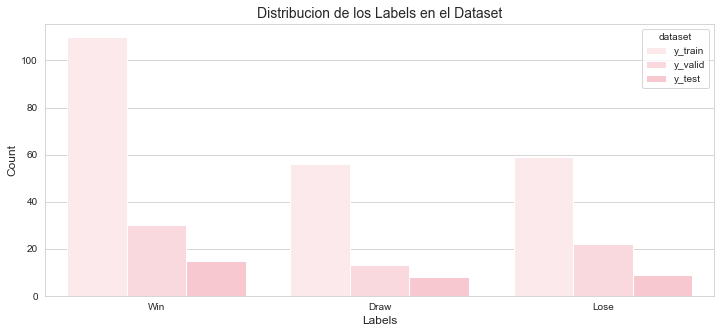

In [16]:
#

labels = pd.concat([pd.DataFrame(y_train).assign(dataset = 'y_train'), pd.DataFrame(y_valid).assign(dataset = 'y_valid'), pd.DataFrame(y_test).assign(dataset = 'y_test')])

plt.figure(figsize = (12, 5))

sns.countplot(data = labels, x = 'label', hue = 'dataset', color = 'pink')
plt.title('Distribucion de los Labels en el Dataset', fontsize = 14)
plt.xlabel('Labels', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

plt.show()


> ### Modelo Baseline

Implementar un modelo Baseline usando, por ejemplo **Logistic Regression** sin ajuste de Hiperparametros.

Calcular la accuracy en los conjuntos de entrenamiento y validacion.

In [17]:
# TODO

clf_baseline = LogisticRegression()
clf_baseline.fit(X_train, y_train)

print('accuracy para entrenamiento: %.8f' %  accuracy_score(y_train, clf_baseline.predict(X_train)))
print('accuracy para    validación: %.8f' % accuracy_score(y_valid, clf_baseline.predict(X_valid)))


accuracy para entrenamiento: 0.62666667
accuracy para    validación: 0.46153846


> ### Seleccion de Clasificadores

Comparar la performance entre clasificadores:
* [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)
* [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)
* [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

**Hint** para mejores resultados:
* Usar [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) y [Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

> **Plotear los resultados en un grafico**

In [18]:
#

test_score_dict = {
    'clf_baseline': {
        'train_score': accuracy_score(y_train, clf_baseline.predict(X_train)),
        'valid_score': accuracy_score(y_valid, clf_baseline.predict(X_valid))
    }
}


In [19]:
#escalamientos y embedding...
from sklearn.preprocessing import StandardScaler

#estandarizamos X's...
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_valid_sc = sc.transform(X_valid)
X_test_sc  = sc.transform(X_test)

#PCA...
pca = PCA(n_components = 4)
X_train_pca = pca.fit_transform(X_train_sc)
X_valid_pca = pca.transform(X_valid_sc)
X_test_pca  = pca.transform(X_test_sc)

print('% Varianza explicada de cada componente:', pca.explained_variance_ratio_)
print('% Varianza explicada total:', sum(pca.explained_variance_ratio_))


% Varianza explicada de cada componente: [0.34342623 0.26223644 0.04099485 0.03397844]
% Varianza explicada total: 0.6806359611548003


> ### 1. Random Forest

In [20]:
#construimos modelo...
clf_RF = RandomForestClassifier(random_state = 42)

#seteamos parámetros para el grid...
parametros = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [5, 10, 20],
    'max_depth': [2, 3, 5],
    'min_samples_split': [18, 20, 22],
    'min_samples_leaf': [3, 5, 7],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

grid_RF = GridSearchCV(clf_RF, param_grid = parametros, cv = 5, scoring = 'accuracy', n_jobs = -1, iid = False)
grid_RF.fit(X_train_pca, y_train)

#mejores...
print('Mejor score: {}'.format(grid_RF.best_score_))
print()
print('Mejores parámetros: {}'.format(grid_RF.best_params_))
print()
print('Mejor combinación: {}'.format(grid_RF.best_estimator_))


Mejor score: 0.5592226613965744

Mejores parámetros: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 18, 'n_estimators': 5}

Mejor combinación: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=18,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


In [21]:
#predicciones...

print('accuracy para entrenamiento: %.8f' %  accuracy_score(y_train, grid_RF.predict(X_train_pca)))
print('accuracy para    validación: %.8f' % accuracy_score(y_valid, grid_RF.predict(X_valid_pca)))

test_score_dict['grid_RF'] = {
    'train_score': accuracy_score(y_train, grid_RF.predict(X_train_pca)),
    'valid_score': accuracy_score(y_valid, grid_RF.predict(X_valid_pca))
}


accuracy para entrenamiento: 0.62666667
accuracy para    validación: 0.56923077


> ### 2. Ada Boost

In [22]:
#construimos modelo...
clf_AB = AdaBoostClassifier(random_state = 42)

#seteamos parámetros para el grid...
parametros = {
    'n_estimators': [250, 300, 350],
    'learning_rate': [.001, .01, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}

grid_AB = GridSearchCV(clf_AB, param_grid = parametros, cv = 5, scoring = 'accuracy', n_jobs = -1, iid = False)
grid_AB.fit(X_train_pca, y_train)

#mejores...
print('Mejor score: {}'.format(grid_AB.best_score_))
print()
print('Mejores parámetros: {}'.format(grid_AB.best_params_))
print()
print('Mejor combinación: {}'.format(grid_AB.best_estimator_))


Mejor score: 0.5335397452788757

Mejores parámetros: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 350}

Mejor combinación: AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.01,
          n_estimators=350, random_state=42)


In [23]:
#predicciones...

print('accuracy para entrenamiento: %.8f' %  accuracy_score(y_train, grid_AB.predict(X_train_pca)))
print('accuracy para    validación: %.8f' % accuracy_score(y_valid, grid_AB.predict(X_valid_pca)))

test_score_dict['grid_AB'] = {
    'train_score': accuracy_score(y_train, grid_AB.predict(X_train_pca)),
    'valid_score': accuracy_score(y_valid, grid_AB.predict(X_valid_pca))
}


accuracy para entrenamiento: 0.54222222
accuracy para    validación: 0.52307692


> ### 3. K-Neighbors

In [24]:
#construimos modelo...
clf_KNN = KNeighborsClassifier()

#seteamos parámetros para el grid...
parametros = {
    'n_neighbors': range(20, 30),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'leaf_size': [30, 40, 50],
    'p': [1, 2]
}

grid_KNN = GridSearchCV(clf_KNN, param_grid = parametros, cv = 5, scoring = 'accuracy', n_jobs = -1, iid = False)
grid_KNN.fit(X_train_pca, y_train)

#mejores...
print('Mejor score: {}'.format(grid_KNN.best_score_))
print()
print('Mejores parámetros: {}'.format(grid_KNN.best_params_))
print()
print('Mejor combinación: {}'.format(grid_KNN.best_estimator_))


Mejor score: 0.5733421168203777

Mejores parámetros: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 25, 'p': 2, 'weights': 'uniform'}

Mejor combinación: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=25, p=2,
           weights='uniform')


In [25]:
#predicciones...

print('accuracy para entrenamiento: %.8f' %  accuracy_score(y_train, grid_KNN.predict(X_train_pca)))
print('accuracy para    validación: %.8f' % accuracy_score(y_valid, grid_KNN.predict(X_valid_pca)))

test_score_dict['grid_KNN'] = {
    'train_score': accuracy_score(y_train, grid_KNN.predict(X_train_pca)),
    'valid_score': accuracy_score(y_valid, grid_KNN.predict(X_valid_pca))
}


accuracy para entrenamiento: 0.58222222
accuracy para    validación: 0.46153846


> ### 4. Logistic Regression

In [26]:
#construimos modelo...
clf_LG = LogisticRegression()

#seteamos parámetros para el grid...
parametros = {
    'C': np.logspace(-3, 3, 7),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [5, 20, 100, 1000, 2000]
}

grid_LG = GridSearchCV(clf_LG, param_grid = parametros, cv = 5, scoring = 'accuracy', n_jobs = -1, iid = False)
grid_LG.fit(X_train_pca, y_train)

#mejores...
print('Mejor score: {}'.format(grid_LG.best_score_))
print()
print('Mejores parámetros: {}'.format(grid_LG.best_params_))
print()
print('Mejor combinación: {}'.format(grid_LG.best_estimator_))


Mejor score: 0.5424198506807203

Mejores parámetros: {'C': 1000.0, 'max_iter': 5, 'penalty': 'l1', 'solver': 'saga'}

Mejor combinación: LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=5,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='saga', tol=0.0001, verbose=0, warm_start=False)


In [27]:
#predicciones...

print('accuracy para entrenamiento: %.8f' %  accuracy_score(y_train, grid_LG.predict(X_train_pca)))
print('accuracy para    validación: %.8f' % accuracy_score(y_valid, grid_LG.predict(X_valid_pca)))

test_score_dict['grid_LG'] = {
    'train_score': accuracy_score(y_train, grid_LG.predict(X_train_pca)),
    'valid_score': accuracy_score(y_valid, grid_LG.predict(X_valid_pca))
}


accuracy para entrenamiento: 0.55555556
accuracy para    validación: 0.46153846


> ### Matriz de Confusion

Plotear la matriz de confusion del mejor modelo sobre el conjunto de **Test**.

**Hint**: Usar la funcion `plot_confusion_matrix` del modulo `utils`.

In [28]:
#mejor modelo...

def highlight_max(s):
    is_max = s == s.max()
    return ['' if v else '' for v in is_max]

pd.DataFrame(test_score_dict).style.highlight_max(color = 'pink', axis = 1)


,clf_baseline,grid_RF,grid_AB,grid_KNN,grid_LG
train_score,0.626667,0.626667,0.542222,0.582222,0.555556
valid_score,0.461538,0.569231,0.523077,0.461538,0.461538


Confusion matrix, without normalization
[[12  0  3]
 [ 4  5  0]
 [ 6  2  0]]


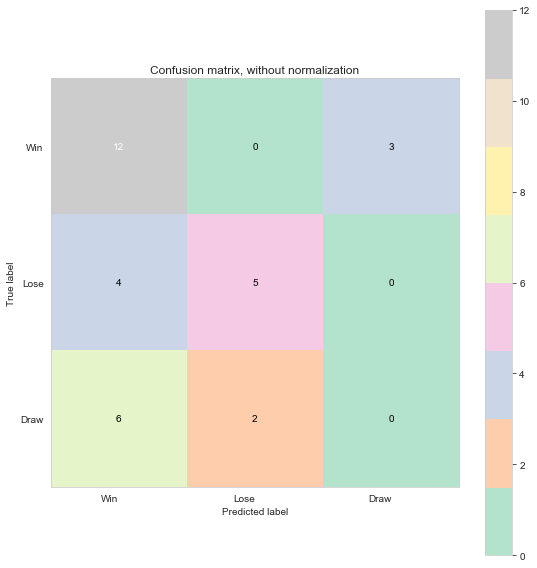

In [29]:
#matriz de confusión...

plot_confusion_matrix(y_test, grid_RF.predict(X_test_pca), my_order, normalize = False)

plt.show()


> ### Classification Report

Imprimir el `classification_report` y explicar lo que refleja este reporte.

In [30]:
#resumen de clasificación...

print(classification_report(y_test, grid_RF.predict(X_test_pca), target_names = ['Draw', 'Lose', 'Win']))


              precision    recall  f1-score   support

        Draw       0.00      0.00      0.00         8
        Lose       0.71      0.56      0.63         9
         Win       0.55      0.80      0.65        15

   micro avg       0.53      0.53      0.53        32
   macro avg       0.42      0.45      0.42        32
weighted avg       0.46      0.53      0.48        32



<h5><FONT COLOR="#FF0000"> Es un informe resumen de las principales métricas de clasificación: precisión, recall, f1-score y el soporte (o cantidad de observaciones de cada clase en el conjunto).</FONT></h5>

---

**Comunicación de Resultados**

Se pide que toda esta información no quede plasmada solamente en un Jupyter Notebook, sino que se diagrame una comunicación en formato textual o interactivo (Google Docs, PDF o Markdown por ejemplo).

La comunicación debe estar apuntada a un público técnico pero sin conocimiento del tema particular, como por ejemplo, sus compañeros de clase.